# For category

In [30]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Category to Product mapping and weights
category_product_map = {
    "topup": ["ntc_topup", "ncell_topup", "smartcell_topup"],
    "bank_transaction": ["bank_withdrawal", "bank_deposit"],
    "bill_payment": ["electricity_bill", "water_bill", "internet_bill"],
    "entertainment": ["movie_ticket", "airline_ticket"],
    "loan": ["loan_repayment", "credit_card_payment"],
    "government": ["tax_payment", "govt_fee"],
    "insurance": ["insurance_payment"],
    "education": ["school_fee"],
    "shopping": ["online_shopping", "mobile_data_pack"]
}

category_weights = {
    "topup": 10,
    "bank_transaction": 6,
    "bill_payment": 8,
    "entertainment": 3,
    "loan": 5,
    "government": 3,
    "insurance": 4,
    "education": 5,
    "shopping": 7
}

# Festivals with format month-day and transaction multiplier
festivals = {
    "New Year Nepali": ("04-13", 3),
    "New Year English": ("01-01", 2.5),
    "Mother's Day": ("05-09", 1.5),
    "Buddha Jayanti": ("05-13", 1.8),
    "Teej": ("08-26", 2),
    "Indra Jatra": ("09-05", 1.5),
    "Dashain Day 1": ("10-05", 3),
    "Dashain Day 2": ("10-06", 3),
    "Dashain Day 3": ("10-07", 3),
    "Dashain Day 4": ("10-08", 3),
    "Dashain Day 5": ("10-09", 3),
    "Tihar Day 1": ("11-01", 3),
    "Tihar Day 2": ("11-02", 3),
    "Tihar Day 3": ("11-03", 3),
    "Tihar Day 4": ("11-04", 3),
    "Chhath": ("11-09", 2),
    "Christmas": ("12-25", 1.5),
    "Maghe Sankranti": ("01-14", 1.7),
    "Shivaratri": ("02-26", 2.5),
    "Holi": ("03-06", 2.8),
    "Valentine's Day": ("02-14", 2),
    "Rakhshya Bandhan": ("08-09", 1.5)
}

# Low activity events
low_activity_events = {
    "Earthquake": ["2023-06-15", "2023-06-16"],
    "Recession Alert": ["2024-02-10", "2024-02-11", "2024-02-12"]
}

# Date range
start_date = datetime(2022, 6, 30)
end_date = datetime(2025, 6, 30)
date_range = pd.date_range(start=start_date, end=end_date, freq="D")

# Helpers
def get_festival_info(date):
    month_day = date.strftime("%m-%d")
    for fest_name, (fest_day, multiplier) in festivals.items():
        if month_day == fest_day:
            return True, fest_name, multiplier
    return False, "", 1.0

def get_low_event_info(date):
    date_str = date.strftime("%Y-%m-%d")
    for event_name, dates in low_activity_events.items():
        if date_str in dates:
            return True, event_name, 0.3  # 70% drop in both amount and volume
    return False, "", 1.0

def get_trend_factors(date):
    days_passed = (date - start_date).days
    amount_trend = 0.02 * (days_passed / 365)
    volume_trend = 0.03 * (days_passed / 365)
    return amount_trend, volume_trend

# Data generation
data = []
for date in date_range:
    is_event, fest_name, fest_multiplier = get_festival_info(date)
    is_low, low_event_name, low_multiplier = get_low_event_info(date)
    is_holiday = is_event or date.weekday() == 6
    amount_trend, volume_trend = get_trend_factors(date)

    # Apply priority: low-activity overrides festival
    if is_low:
        event_name = low_event_name
        volume_multiplier = low_multiplier
        amount_multiplier = low_multiplier
    else:
        event_name = fest_name if is_event else ""
        volume_multiplier = fest_multiplier
        amount_multiplier = fest_multiplier

    base_txns = random.randint(50, 100)
    scaled_txns = int(base_txns * (1 + volume_trend) * volume_multiplier)

    for _ in range(scaled_txns):
        category = random.choices(list(category_product_map.keys()), weights=list(category_weights.values()))[0]
        product = random.choice(category_product_map[category])
        base_amount = random.randint(50, 5000)
        final_amount = base_amount * (1 + amount_trend) * random.uniform(1.0, amount_multiplier)

        data.append([
            date.strftime("%Y-%m-%d"),
            category,
            round(final_amount, 2),
        ])

# Final DataFrame
df = pd.DataFrame(data, columns=[
    "transaction_date", "category", "amount"
])
df.head(), len(df)


(  transaction_date          category  amount
 0       2022-06-30             topup  4702.0
 1       2022-06-30         education  4064.0
 2       2022-06-30  bank_transaction  1005.0
 3       2022-06-30          shopping  3900.0
 4       2022-06-30  bank_transaction   827.0,
 93200)

In [31]:
aggregated_df = df.groupby(['transaction_date', 'category']).agg(
    transaction_amount=('amount', 'sum'),
    transaction_count=('amount', 'count')
).reset_index()

In [23]:
aggregated_df['transaction_date'] = pd.to_datetime(aggregated_df['transaction_date']) 

In [32]:
aggregated_df.to_csv("category_prediction_data_v6.csv", index=False)

# For product

In [33]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Category to Product mapping and weights
category_product_map = {
    "topup": ["ntc_topup", "ncell_topup", "smartcell_topup"],
    "bank_transaction": ["bank_withdrawal", "bank_deposit"],
    "bill_payment": ["electricity_bill", "water_bill", "internet_bill"],
    "entertainment": ["movie_ticket", "airline_ticket"],
    "loan": ["loan_repayment", "credit_card_payment"],
    "government": ["tax_payment", "govt_fee"],
    "insurance": ["insurance_payment"],
    "education": ["school_fee"],
    "shopping": ["online_shopping", "mobile_data_pack"]
}

category_weights = {
    "topup": 10,
    "bank_transaction": 6,
    "bill_payment": 8,
    "entertainment": 3,
    "loan": 5,
    "government": 3,
    "insurance": 4,
    "education": 5,
    "shopping": 7
}

# Festivals with format month-day and transaction multiplier
festivals = {
    "New Year Nepali": ("04-13", 3),
    "New Year English": ("01-01", 2.5),
    "Mother's Day": ("05-09", 1.5),
    "Buddha Jayanti": ("05-13", 1.8),
    "Teej": ("08-26", 2),
    "Indra Jatra": ("09-05", 1.5),
    "Dashain Day 1": ("10-05", 3),
    "Dashain Day 2": ("10-06", 3),
    "Dashain Day 3": ("10-07", 3),
    "Dashain Day 4": ("10-08", 3),
    "Dashain Day 5": ("10-09", 3),
    "Tihar Day 1": ("11-01", 3),
    "Tihar Day 2": ("11-02", 3),
    "Tihar Day 3": ("11-03", 3),
    "Tihar Day 4": ("11-04", 3),
    "Chhath": ("11-09", 2),
    "Christmas": ("12-25", 1.5),
    "Maghe Sankranti": ("01-14", 1.7),
    "Shivaratri": ("02-26", 2.5),
    "Holi": ("03-06", 2.8),
    "Valentine's Day": ("02-14", 2),
    "Rakhshya Bandhan": ("08-09", 1.5)
}

# Low activity events
low_activity_events = {
    "Earthquake": ["2023-06-15", "2023-06-16"],
    "Recession Alert": ["2024-02-10", "2024-02-11", "2024-02-12"]
}

# Date range
start_date = datetime(2022, 6, 30)
end_date = datetime(2025, 6, 30)
date_range = pd.date_range(start=start_date, end=end_date, freq="D")

# Helpers
def get_festival_info(date):
    month_day = date.strftime("%m-%d")
    for fest_name, (fest_day, multiplier) in festivals.items():
        if month_day == fest_day:
            return True, fest_name, multiplier
    return False, "", 1.0

def get_low_event_info(date):
    date_str = date.strftime("%Y-%m-%d")
    for event_name, dates in low_activity_events.items():
        if date_str in dates:
            return True, event_name, 0.3  # 70% drop in both amount and volume
    return False, "", 1.0

def get_trend_factors(date):
    days_passed = (date - start_date).days
    amount_trend = 0.02 * (days_passed / 365)
    volume_trend = 0.03 * (days_passed / 365)
    return amount_trend, volume_trend

# Data generation
data = []
for date in date_range:
    is_event, fest_name, fest_multiplier = get_festival_info(date)
    is_low, low_event_name, low_multiplier = get_low_event_info(date)
    is_holiday = is_event or date.weekday() == 6
    amount_trend, volume_trend = get_trend_factors(date)

    # Apply priority: low-activity overrides festival
    if is_low:
        event_name = low_event_name
        volume_multiplier = low_multiplier
        amount_multiplier = low_multiplier
    else:
        event_name = fest_name if is_event else ""
        volume_multiplier = fest_multiplier
        amount_multiplier = fest_multiplier

    base_txns = random.randint(50, 100)
    scaled_txns = int(base_txns * (1 + volume_trend) * volume_multiplier)

    for _ in range(scaled_txns):
        category = random.choices(list(category_product_map.keys()), weights=list(category_weights.values()))[0]
        product = random.choice(category_product_map[category])
        base_amount = random.randint(50, 5000)
        final_amount = base_amount * (1 + amount_trend) * random.uniform(1.0, amount_multiplier)

        data.append([
            date.strftime("%Y-%m-%d"),
            category,
            product,
            round(final_amount, 2),
        ])

# Final DataFrame
df = pd.DataFrame(data, columns=[
    "transaction_date", "category", 'product', "amount"
])
df.head(), len(df)


(  transaction_date          category        product  amount
 0       2022-06-30      bill_payment  internet_bill   136.0
 1       2022-06-30         education     school_fee  4869.0
 2       2022-06-30      bill_payment     water_bill  2491.0
 3       2022-06-30  bank_transaction   bank_deposit  3886.0
 4       2022-06-30        government       govt_fee   734.0,
 92010)

In [34]:
aggregated_df = df.groupby(['transaction_date', 'category', 'product']).agg(
    transaction_amount=('amount', 'sum'),
    transaction_count=('amount', 'count')
).reset_index()

In [35]:
aggregated_df['transaction_date'] = pd.to_datetime(aggregated_df['transaction_date']) 

In [36]:
aggregated_df.to_csv("product_prediction_data_v6.csv", index=False)

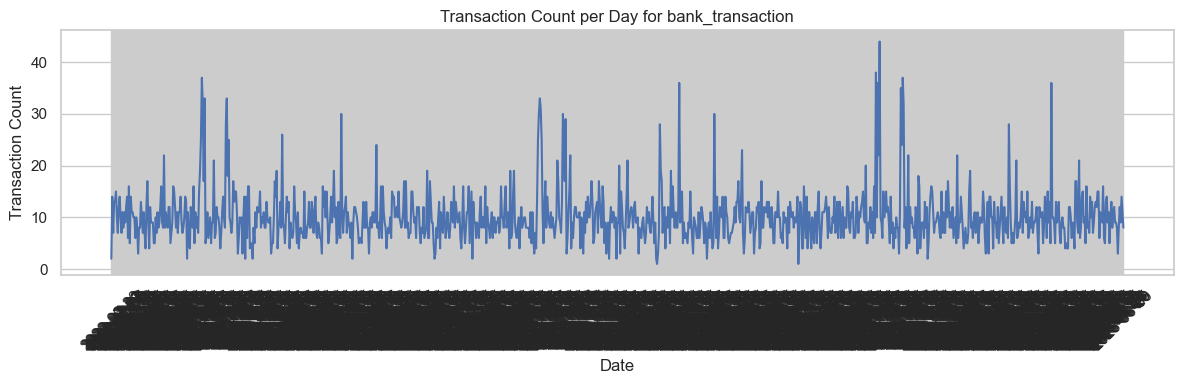

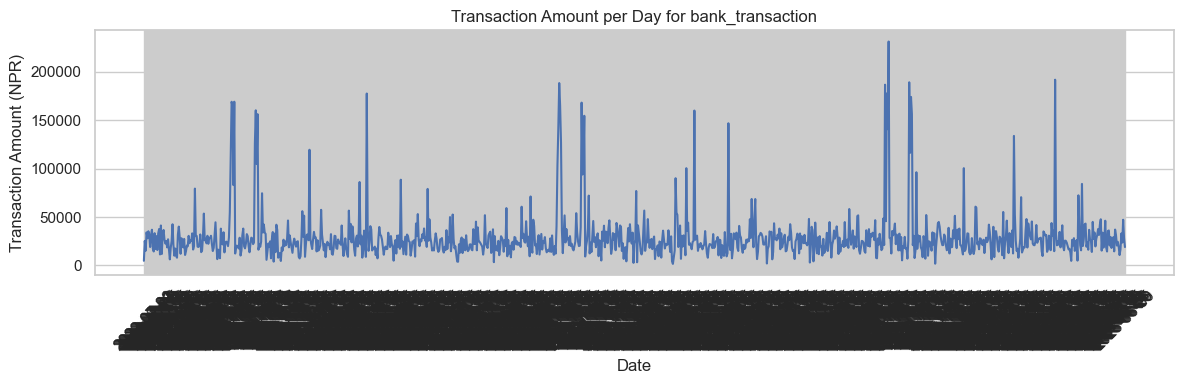

KeyboardInterrupt: 

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Parse date and sort

df["category"] = df["category"].astype(str)

# Group by transaction_date and category
grouped = df.groupby(["transaction_date", "category"]).agg(
    transaction_count=("amount", "count"),
    transaction_amount=("amount", "sum")
).reset_index()

# Unique categories
categories = grouped["category"].unique()

# Set style
sns.set(style="whitegrid")

# Plot for each category
for cat in categories:
    cat_data = grouped[grouped["category"] == cat]

    # Count Plot
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=cat_data, x="transaction_date", y="transaction_count")
    plt.title(f"Transaction Count per Day for {cat}")
    plt.xlabel("Date")
    plt.ylabel("Transaction Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Amount Plot
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=cat_data, x="transaction_date", y="transaction_amount")
    plt.title(f"Transaction Amount per Day for {cat}")
    plt.xlabel("Date")
    plt.ylabel("Transaction Amount (NPR)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
